# Testing the 0-$\pi$ Qubit

In [1]:
import circuitq as cq
import numpy as np
import networkx as nx
import scqubits as sc
import matplotlib.pyplot as plt

## CircuitQ implementation

In [2]:
graph = nx.MultiGraph()
graph.add_edge(1,2, element = 'C')
graph.add_edge(1,2, element = 'J')
graph.add_edge(2,3, element = 'L')
graph.add_edge(3,4, element = 'J')
graph.add_edge(3,4, element = 'C')
graph.add_edge(4,1, element = 'L')
graph.add_edge(1,3, element = 'C')
graph.add_edge(2,4, element = 'C');

In [3]:
circuit = cq.CircuitQ(graph, ground_nodes=[1])
circuit.h_parameters

[C_{12},
 C_{13},
 C_{24},
 C_{34},
 Cp_{14},
 Cp_{23},
 E_{J120},
 E_{J340},
 L_{140},
 L_{230},
 \tilde{\Phi}_{340}]

In [4]:
h_num = circuit.get_numerical_hamiltonian(80, parameter_values=[False,
                                                               100*circuit.c_v['C'],
                                                               100*circuit.c_v['C'],
                                                               False,
                                                               False,
                                                               False,
                                                               False,
                                                               False,
                                                               False,
                                                               False,
                                                               False])
eigv, eigs = circuit.get_eigensystem()

## scQubits implementation

In [5]:
phi_grid = sc.Grid1d(-4*np.pi, 4*np.pi, 200)
zero_pi = sc.ZeroPi(grid = phi_grid,
                           EJ   = circuit.c_v["E"],
                           EL   = (circuit.phi_0**2)/circuit.c_v["L"],
                           ECJ  = circuit.c_v["E_C"],
                           EC   = (1/100)*circuit.c_v["E_C"],
                           ng   = 0,
                           flux = 0,
                           ncut = 30)

In [6]:
esys = zero_pi.eigensys(evals_count=30)

### Compare

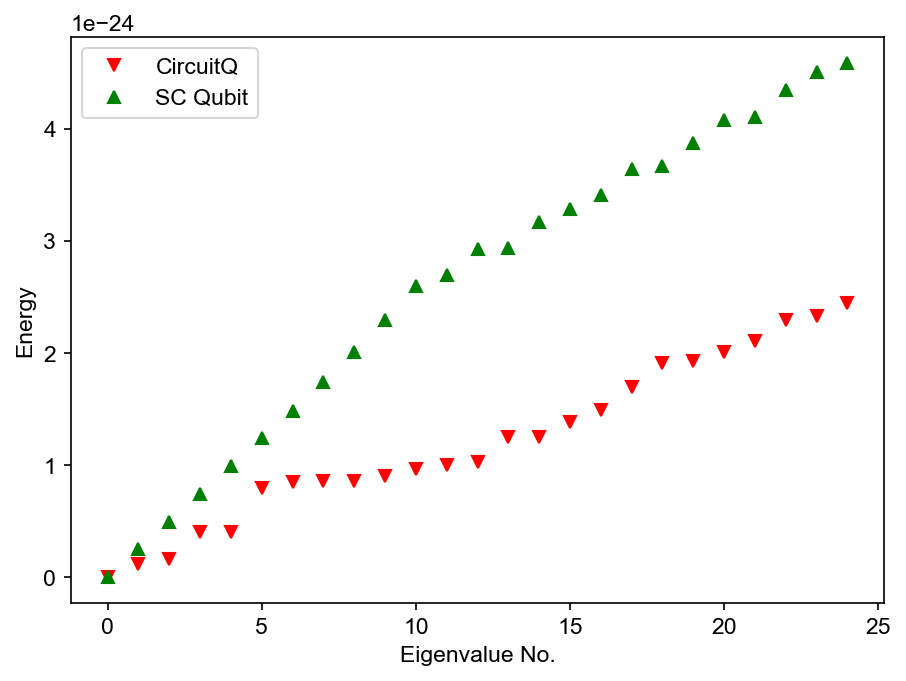

In [7]:
plt.figure(figsize=(7,5))
plt.plot(np.arange(25), eigv[:25]-np.min(eigv), 'rv', label="CircuitQ")
plt.plot(np.arange(25), esys[0][:25]-np.min(esys[0]), 'g^', label="SC Qubit")
plt.legend()
plt.xlabel("Eigenvalue No.")
plt.ylabel("Energy")
#plt.savefig("/Users/philipp/Downloads/0-pi-test.pdf")
#plt.ticklabel_format(style='scientific', scilimits=(0, 0))
plt.show() 